## Joshua Musei (jmuzei2)
## IE598 MLF F18
## Module 5 Homework (Dimensionality Reduction)

### Part 1: Exploratory Data Analysis


In [4]:
import pandas as pd
import ipywidgets
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
%matplotlib inline

In [5]:
df = pd.read_csv('hw5_treasury yield curve data.csv')

df.head()

,Date,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,5/17/2019,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,5/16/2019,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,5/15/2019,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,5/14/2019,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,5/13/2019,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


In [6]:
df = df.iloc[:,1:]

In [7]:
df.shape

(8071, 31)

In [8]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SVENF01    8071 non-null   float64
 1   SVENF02    8071 non-null   float64
 2   SVENF03    8071 non-null   float64
 3   SVENF04    8071 non-null   float64
 4   SVENF05    8071 non-null   float64
 5   SVENF06    8071 non-null   float64
 6   SVENF07    8071 non-null   float64
 7   SVENF08    8071 non-null   float64
 8   SVENF09    8071 non-null   float64
 9   SVENF10    8071 non-null   float64
 10  SVENF11    8071 non-null   float64
 11  SVENF12    8071 non-null   float64
 12  SVENF13    8071 non-null   float64
 13  SVENF14    8071 non-null   float64
 14  SVENF15    8071 non-null   float64
 15  SVENF16    8071 non-null   float64
 16  SVENF17    8071 non-null   float64
 17  SVENF18    8071 non-null   float64
 18  SVENF19    8071 non-null   float64
 19  SVENF20    8071 non-null   float64
 20  SVENF21 

In [9]:
print(df.isnull().sum())

SVENF01      0
SVENF02      0
SVENF03      0
SVENF04      0
SVENF05      0
SVENF06      0
SVENF07      0
SVENF08      0
SVENF09      0
SVENF10      0
SVENF11      0
SVENF12      0
SVENF13      0
SVENF14      0
SVENF15      0
SVENF16      0
SVENF17      0
SVENF18      0
SVENF19      0
SVENF20      0
SVENF21      0
SVENF22      0
SVENF23      0
SVENF24      0
SVENF25      0
SVENF26      0
SVENF27      0
SVENF28      0
SVENF29      0
SVENF30      0
Adj_Close    0
dtype: int64


In [10]:
# Data summary
df.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,...,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000,8071.000000
mean,3.785311,4.258972,4.669363,5.022430,5.318493,5.559644,5.750071,5.895135,6.000596,6.072112,...,5.689046,5.621666,5.554136,5.486943,5.420479,5.355063,5.290948,5.228333,5.167371,5.509793
std,2.648060,2.498137,2.341348,2.221632,2.137801,2.080405,2.040337,2.010786,1.987244,1.966960,...,1.801291,1.797858,1.797012,1.798842,1.803390,1.810643,1.820541,1.832984,1.847834,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.424500,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.144050,1.865600,2.536550,3.023050,3.544700,4.063300,4.409750,4.644300,4.774550,4.859500,...,4.177450,4.090550,4.024800,3.982950,3.962100,3.887150,3.840900,3.825050,3.831350,3.130587
50%,3.986500,4.393300,4.505500,4.718900,5.051300,5.394600,5.663700,5.870800,5.993700,6.082400,...,5.619600,5.503000,5.369900,5.228000,5.096700,4.979700,4.860800,4.758600,4.669000,4.956219
75%,5.901500,6.221250,6.461300,6.626600,6.779550,6.908050,7.049900,7.181600,7.297550,7.393350,...,7.330550,7.233200,7.114900,6.998150,6.871050,6.765400,6.650600,6.535450,6.421850,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.649900,10.741400,10.766300,10.747500,10.701500,10.640000,...,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.535100,10.150118


In [11]:
# Box plot : select the variable name to see the corresponding plots
var_name = df.columns.to_list()
@ipywidgets.interact(xyname = var_name)
def box_plot(xyname):
    sns.boxplot(df[xyname])

interactive(children=(Dropdown(description='xyname', options=('SVENF01', 'SVENF02', 'SVENF03', 'SVENF04', 'SVE…

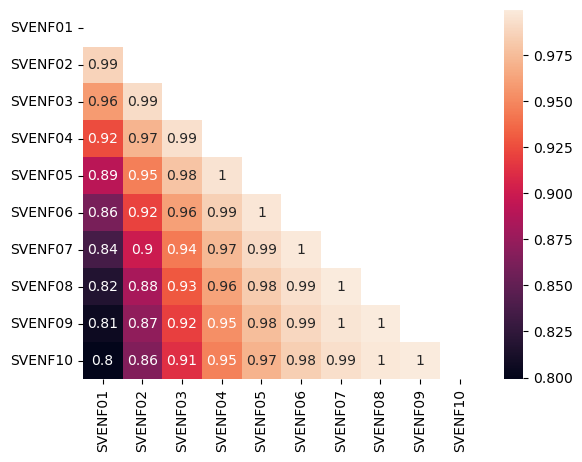

In [12]:
corr = df.iloc[:,[0,1,2,3,4,5,6,7,8,9]].corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True)
plt.savefig('plot1.png', dpi=300)

<AxesSubplot:>

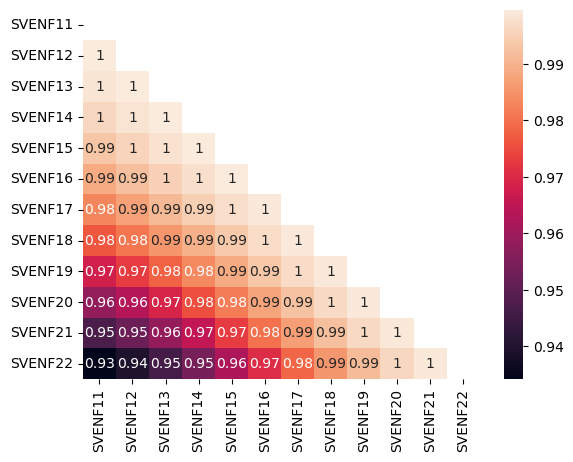

In [10]:
corr = df.iloc[:,[10,11,12,13,14,15,16,17,18,19,20,21]].corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True)

<AxesSubplot:>

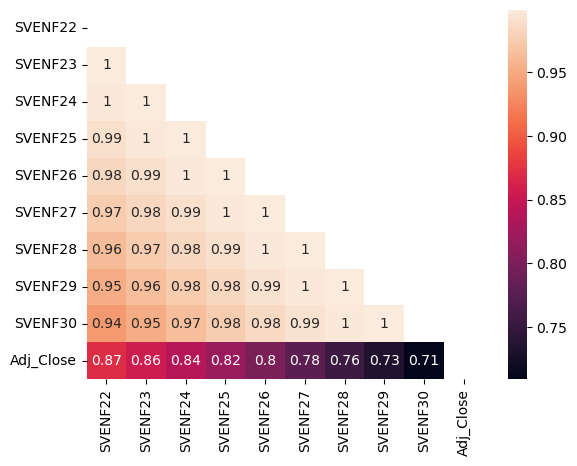

In [11]:
corr = df.iloc[:,[21,22,23,24,25,26,27,28,29,30]].corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True)

### Split data into training and test sets.  Use random_state = 42. Use 85% of the data for the training set.  Use the same split for all experiments.

In [12]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['Adj_Close'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42)

### Part 2: Perform a PCA on the Treasury Yield dataset


In [13]:
import numpy as np
from sklearn.decomposition import PCA

In [14]:
## Compute and display the explained variance ratio for all components

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [15]:
y_train_std = sc.fit_transform(y_train.reshape(-1, 1))
y_test_std = sc.fit_transform(y_test.reshape(-1, 1))

In [16]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([9.31796975e-01, 4.07650756e-02, 2.18438668e-02, 4.85133058e-03,
       6.63341250e-04, 6.87379176e-05, 9.48168675e-06, 1.09876995e-06,
       8.50910960e-08, 6.74428451e-09, 4.72621857e-10, 3.80161775e-11,
       9.30609065e-12, 8.71811396e-12, 8.59362280e-12, 8.53519254e-12,
       8.41818231e-12, 8.32407041e-12, 8.16475927e-12, 8.12446450e-12,
       7.94366171e-12, 7.84486451e-12, 7.70300119e-12, 7.56475430e-12,
       7.49445649e-12, 7.39336209e-12, 7.21415235e-12, 6.93802195e-12,
       6.58019099e-12, 6.26023985e-12])

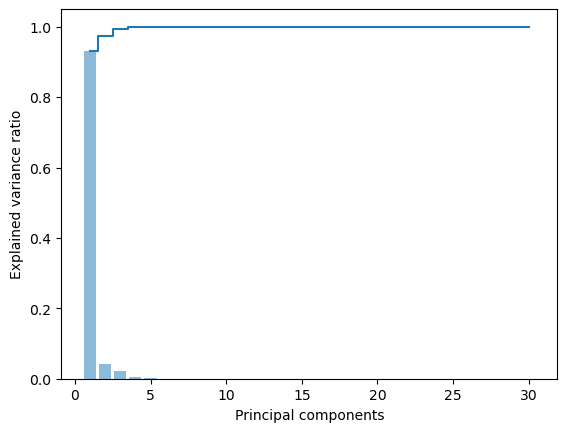

In [17]:
plt.bar(range(1, 31), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 31), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [18]:
## then recalculate and display on n_components=3.
my_model = PCA(n_components=3)
my_model.fit_transform(X_train_std)

print (my_model.explained_variance_ratio_[0])
print (my_model.explained_variance_ratio_[1])
print (my_model.explained_variance_ratio_[2])


0.9317969749380349
0.04076507559642959
0.021843866774838596


In [19]:
## What is the cumulative explained variance of the 3 component version.

print (my_model.explained_variance_ratio_.cumsum())

[0.93179697 0.97256205 0.99440592]


### Part 3: Linear regression v. SVM regressor - baseline
#### Linear regression to the baseline data

In [20]:
#%%timeit

# Fit a linear regression model to the original dataset with 30 attributes

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Calculate its accuracy R2 score and RMSE for both in sample and out of sample (train and test sets).  
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.603, test: 0.612
R^2 train: 0.902, test: 0.904


#### Linear regression to the baseline data with X variable transformed

In [22]:
# Fit a linear regression model to the original dataset with 30 attributes 
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train_std, y_train)

# Calculate its accuracy R2 score and RMSE for both in sample and out of sample (train and test sets).  

y_train_pred = mlr.predict(X_train_std)
y_test_pred = mlr.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.603, test: 0.612
R^2 train: 0.902, test: 0.904


#### SVM regressor - baseline

In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [24]:
param = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svr = SVR()
grids = GridSearchCV(svr,param,cv=5)
svm_lr = grids.fit(X_train_std, np.ravel(y_train))

In [25]:
print(svm_lr.best_params_)
print(svm_lr.best_score_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.998917359760594


In [26]:
# Calculate its accuracy R2 score and RMSE for both in sample and out of sample (SVR model).  

y_train_pred = svm_lr.predict(X_train_std)
y_test_pred = svm_lr.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.004, test: 0.005
R^2 train: 0.999, test: 0.999


#### linear regression model to the PCA transformed dataset with 3 PCs

In [27]:
# Fit a linear regression model to the PCA transformed dataset with 3 PCs
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

pca_lr = LinearRegression()
pca_lr = pca_lr.fit(X_train_pca, y_train)

# Calculate its accuracy R2 score and RMSE for both in sample and out of sample (train and test sets).  

y_train_pred = pca_lr.predict(X_train_pca)
y_test_pred = pca_lr.predict(X_test_pca)



print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.820, test: 0.854
R^2 train: 0.867, test: 0.866


#### SVR model to the PCA transformed dataset with 3 PCs

In [30]:
parameters = {'C': [0.1, 0.2, 0.3,1], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
svr = SVR()
grids = GridSearchCV(svr,parameters,cv=2)
svm_pca = grids.fit(X_train_pca, np.ravel(y_train))

In [29]:
print(svm_pca.best_params_)
print(svm_pca.best_score_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
0.9920578548974921


In [31]:
# Calculate its accuracy R2 score and RMSE for both in sample and out of sample (train and test sets).  

y_train_pred = svm_pca.predict(X_train_pca)
y_test_pred = svm_pca.predict(X_test_pca)



print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.051, test: 0.054
R^2 train: 0.992, test: 0.992


In [1]:
print("My name is {Joshua Muzei}")
print("My NetID is: {jmuzei2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Joshua Muzei}
My NetID is: {jmuzei2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
